In [106]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
import scipy.stats as stats
import scipy.integrate as integrate
import scipy.optimize as opt
import math

# 14.1

In [30]:
def midpoint(f, a, b, N):
    x=np.zeros(N)
    g=np.vectorize(f)
    for i in range(N):
        x[i]=a+(2*i+1)*(b-a)/(2*N)
    return ((b-a)/N)*g(x).sum()
def trapezoid(f,a,b,N):
    x=np.zeros(N+1)
    g=np.vectorize(f)
    for i in range(N+1):
        x[i]=a+(b-a)*i/N
    return ((b-a)/(2*N))*(2*g(x).sum()-g(x[0])-g(x[N]))
def Simpsons(f,a,b,N):
    xodd=np.zeros(N)
    xeven=np.zeros(N)
    g=np.vectorize(f)
    for i in range(N):
        xodd[i]=a+(2*i+1)*(b-a)/(2*N)
        xeven[i]=a+(2*i)*(b-a)/(2*N)
    return ((b-a)/(6*(N+1))*(4*(g(xodd).sum())+2*(g(xeven).sum())-f(a)+f(b)))

In [34]:
def newton_cotes(f,a,b,N,method):
    if method=='midpoint':
        return midpoint(f,a,b,N)
    if method=='trapezoid':
        return trapezoid(f,a,b,N)
    if method=='Simpsons':
        return Simpsons(f,a,b,N)

In [52]:
f =lambda x: 0.1*x**4-1.5*x**3+0.53*x**2+2*x+1
newton_cotes(f,-10,10,500,'Simpsons'), newton_cotes(f,-10,10,500,'trapezoid'),newton_cotes(f,-10,10,500,'midpoint')

(4364.6041251257484, 4373.4428264959997, 4373.2785868159999)

# 14.2

In [40]:
def normdisc(mu,sigma,N,k):
    a=mu-sigma*k
    b=mu+sigma*k
    Z=np.zeros(N)
    for i in range(N):
        Z[i]=a+i*(b-a)/(N-1)
    w=np.zeros(N)
    w[0]=stats.norm.cdf((Z[0]+Z[1])/2, loc=mu, scale=sigma)
    w[N-1]=1-stats.norm.cdf((Z[-1]+Z[-2])/2, loc=mu, scale=sigma)
    for i in range(1,N-1):
        w[i]=stats.norm.cdf((Z[i+1]+Z[i])/2,loc=mu, scale=sigma)-stats.norm.cdf((Z[i]+Z[i-1])/2,loc=mu,scale=sigma)
    return Z,w

In [41]:
normdisc(0,1,11,3)

(array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]),
 array([ 0.00346697,  0.01439745,  0.04894278,  0.11725292,  0.19802845,
         0.23582284,  0.19802845,  0.11725292,  0.04894278,  0.01439745,
         0.00346697]))

# 14.3

In [42]:
def lnormdisc(mu,sigma,N,k):
    Z,w=normdisc(mu,sigma,N,k)
    A=np.exp(Z)
    return A,w

In [43]:
lnormdisc(0,1,11,3)

(array([  0.04978707,   0.09071795,   0.16529889,   0.30119421,
          0.54881164,   1.        ,   1.8221188 ,   3.32011692,
          6.04964746,  11.02317638,  20.08553692]),
 array([ 0.00346697,  0.01439745,  0.04894278,  0.11725292,  0.19802845,
         0.23582284,  0.19802845,  0.11725292,  0.04894278,  0.01439745,
         0.00346697]))

# 14.4

In [49]:
muinc=10.5
stdinc=0.8
Y,wY=lnormdisc(muinc,stdinc,50,5)
#Compare the two expected values:
print('Expected value of the discrete version=',np.dot(Y,wY),'\nExpected value of the continuous version=',
      np.exp(muinc+(stdinc**2)/2))

Expected value of the discrete version= 50066.5544856 
Expected value of the continuous version= 50011.0870085


# 14.5

In [59]:
def crit(params):
    w1,w2,w3,x1,x2,x3=params
    w=np.array([w1,w2,w3])
    x=np.array([x1,x2,x3])
    error1=abs(w1+w2+w3-20)
    error2=abs(np.dot(w,x))
    error3=abs(np.dot(w,x**2)-2*((10**3)/3))
    error4=abs(np.dot(w,x**3))
    error5=abs(np.dot(w,x**4)-2*((10**5)/5))
    return error1+error2+error3+error4+error5

In [66]:
params_init=np.array([1,1,1,-10,0,10])
W=opt.minimize(crit,params_init, bounds=((1e-10,None),(1e-10,None),(1e-10,None),
                                      (-10,10),(-10,10),(-10,10))).x
w=W[:3]
x=W[3:]
g=np.vectorize(f)
np.dot(w,g(x))

4217.0002391649314

Not quite there

# 14.6

In [55]:
integrate.quad(f,-10,10)

(4373.333333333334, 8.109531705284936e-11)

Very close to the exact value

# 14.7

In [86]:
def montecarlo(g, Omega, N):
    V=1
    for i in range(len(Omega[:,0])):
        dim=Omega[i,1]-Omega[i,0]
        V*=dim
    X=np.zeros((N,len(Omega[:,0])))
    for j in range(len(Omega[:,0])):
        X[:,j]=(Omega[j,1]-Omega[j,0])*np.random.random(N)+Omega[j,0]
    G=np.zeros(N)
    for l in range(N):
        G[l]=g(X[l,:])
    return (V/N)*G.sum()
    

In [130]:
def g(X):
    if (X[0]**2+X[1]**2)<=1:
        return 1
    else:
        return 0
Omega=np.array([[-1,1],[-1,1]])

In [132]:
def mindraw():
    N=100
    while abs(montecarlo(g,Omega,N)-np.pi)>1e-4:
        N+=1
    return N


array([1, 1])

In [103]:
mindraw()

1533

# 14.8 

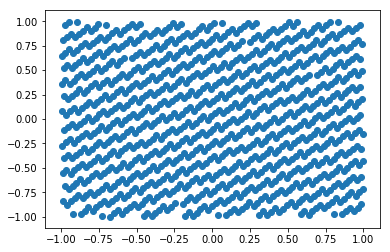

(array([[ 0.7781122 ,  0.1671683 ,  0.5562244 ,  0.94528049,  0.33433659,
          0.72339269,  0.11244879,  0.50150489,  0.89056099,  0.27961709,
          0.66867319,  0.05772929,  0.44678539,  0.83584148,  0.22489758,
          0.61395368,  0.00300978,  0.39206588,  0.78112198,  0.17017808],
        [ 0.17107385,  0.25661077,  0.34214769,  0.42768462,  0.51322154,
          0.59875846,  0.68429539,  0.76983231,  0.85536923,  0.94090616,
          0.02644308,  0.11198   ,  0.19751692,  0.28305385,  0.36859077,
          0.45412769,  0.53966462,  0.62520154,  0.71073846,  0.79627539]]),
 array([ 0.78112198,  0.71073846]))

In [160]:
def Niederreiter(n, s):
    seq = np.zeros((s, n))
    for i in range(1, n + 1):
        for j in range(1, s + 1):
            seq[j - 1, i - 1] = ((i) * 2. ** ((j) / (j + 1.)) -
                                 math.floor((i) * 2. **
                                 ((j) / (j + 1.))))
    return seq
def Baker(n, s):
    seq = np.zeros((s,n))
    for i in range(1, n+1):
        for j in range(1, s+1):
            seq[j-1, i-1] = ((i+1)*np.exp(j + 1)) - math.floor((i + 1) *
                    np.exp(j + 1))
    return seq
x,y=2*Baker(1000,2)-1
plt.scatter(x,y)
plt.show()
Baker(20,2), getelement(19,2,Baker)

In [144]:
def getelement(n,s,seq):
    return seq(n,s)[:,-1]

# 14.9

In [165]:
def quasimontecarlo(g, Omega, N,seq):
    V=1
    s=len(Omega[:,0])
    for i in range(s):
        dim=Omega[i,1]-Omega[i,0]
        V*=dim
    X=np.zeros((N,s))
    for j in range(1,N+1):
        X[j-1,:]=((Omega[:,1]-Omega[:,0]))*getelement(j,s,seq)+Omega[:,0]
    G=np.zeros(N)
    for l in range(N):
        G[l]=g(X[l,:])
    return (V/N)*G.sum()

In [166]:
quasimontecarlo(g,Omega,1000,Baker)

3.1440000000000001